# RL Figure: 2D Turbulence Snapshot + Filters

In [3]:
using JLD2, Interpolations, Statistics, ForwardDiff, OrdinaryDiffEq

const n = 512 # grid resolution 
const L = 2π  # domain length           

##### Load Velocity Field #####
file = jldopen("../../Data Generation/2d-turb-data.jld")
u_data = file["vel_x"][:,:,1]
v_data = file["vel_y"][:,:,1]
vort_data = file["vort"][:,:,1]
close(file)

##### Interpolations #####
itp_vort = interpolate(vort_data, BSpline(Linear(Periodic())))
itp_u = interpolate(u_data, BSpline(Linear(Periodic())))
itp_v = interpolate(v_data, BSpline(Linear(Periodic())))

etp_vort = extrapolate(itp_vort, Periodic())
etp_u = extrapolate(itp_u, Periodic())
etp_v = extrapolate(itp_v, Periodic())

vort(x,y) = etp_vort(n*x/L+1, n*y/L+1)
velX(x,y) = etp_u(n*x/L+1, n*y/L+1)
velY(x,y) = etp_v(n*x/L+1, n*y/L+1)

##### Start, End #####
xA = 1.2
yA = 5.5
rA = 0.2

xB = 5.2
yB = 1.8
rB = 0.2

N_tile = 30 
δ = L/N_tile # grid size for tiling

u0 = maximum(sqrt.(u_data.^2+v_data.^2)) # background maximum velocity
Va = 0.3*u0 # agent's velocity
Δt = δ/(2*u0) # agent's reaction time
Na = 8 # number of actions

n_episodes = 5000 # number of episodes for evaluation
n_train = 100000 # number of episodes for training

T_free = sqrt((xB-xA)^2+(yB-yA)^2)/Va
T_max = 5*T_free

w_reward = 1.0 # weight in the reward function

# optimal trajectory

##### Derivatives #####
velX_x(x,y) = ForwardDiff.derivative(z -> velX(z, y), x)
velX_y(x,y) = ForwardDiff.derivative(z -> velX(x, z), y)
velY_x(x,y) = ForwardDiff.derivative(z -> velY(z, y), x)
velY_y(x,y) = ForwardDiff.derivative(z -> velY(x, z), y)

function TURB_advection!(du, u, p, t)
    x, y, z = u
    T = p[2]
    du[1] = dx = T*velX(x,y) + Va*T*cos(z)
    du[2] = dy = T*velY(x,y) + Va*T*sin(z)
    du[3] = dz = T*(velY_x(x,y)*sin(z)*sin(z) - velX_y(x,y)*cos(z)*cos(z) + sin(z)*cos(z)*(velX_x(x,y)-velY_y(x,y)))
end

# Simulation interval and intermediary points
tspan_opt = (0.0, 1.0)
tsteps_opt = 0.0:0.001:1.0

p_opt = [-0.8836008560984615, 0.8199981595228619]

prob_opt = ODEProblem(TURB_advection!, [xA, yA, p_opt[1]], tspan_opt, p_opt)
opt_solution = solve(prob_opt, Tsit5(), p = p_opt, saveat = tsteps_opt,
                    reltol = 1e-15, abstol = 1e-15)

times = range(0, 1, length=200)
x_opt = [opt_solution(t)[1] for t in times]
y_opt = [opt_solution(t)[2] for t in times]

nothing

In [5]:
##### Load Filtered Velocity Field #####
file_filt_10 = jldopen("../../Data Generation/2d-turb-data-filter-k10.jld")
u_data_filt_10 = file_filt_10["vel_x"][:,:,1]
v_data_filt_10 = file_filt_10["vel_y"][:,:,1]
vort_data_filt_10 = file_filt_10["vort"][:,:,1]
close(file_filt_10)

itp_vort_filt_10 = interpolate(vort_data_filt_10, BSpline(Linear(Periodic())))
itp_u_filt_10 = interpolate(u_data_filt_10, BSpline(Linear(Periodic())))
itp_v_filt_10 = interpolate(v_data_filt_10, BSpline(Linear(Periodic())))

etp_vort_filt_10 = extrapolate(itp_vort_filt_10, Periodic())
etp_u_filt_10 = extrapolate(itp_u_filt_10, Periodic())
etp_v_filt_10 = extrapolate(itp_v_filt_10, Periodic())

vort_filt_10(x,y) = etp_vort_filt_10(n*x/L+1, n*y/L+1)
velX_filt_10(x,y) = etp_u_filt_10(n*x/L+1, n*y/L+1)
velY_filt_10(x,y) = etp_v_filt_10(n*x/L+1, n*y/L+1)

#############

file_filt_5 = jldopen("../../Data Generation/2d-turb-data-filter-k5.jld")
u_data_filt_5 = file_filt_5["vel_x"][:,:,1]
v_data_filt_5 = file_filt_5["vel_y"][:,:,1]
vort_data_filt_5 = file_filt_5["vort"][:,:,1]
close(file_filt_5)

itp_vort_filt_5 = interpolate(vort_data_filt_5, BSpline(Linear(Periodic())))
itp_u_filt_5 = interpolate(u_data_filt_5, BSpline(Linear(Periodic())))
itp_v_filt_5 = interpolate(v_data_filt_5, BSpline(Linear(Periodic())))

etp_vort_filt_5 = extrapolate(itp_vort_filt_5, Periodic())
etp_u_filt_5 = extrapolate(itp_u_filt_5, Periodic())
etp_v_filt_5 = extrapolate(itp_v_filt_5, Periodic())

vort_filt_5(x,y) = etp_vort_filt_5(n*x/L+1, n*y/L+1)
velX_filt_5(x,y) = etp_u_filt_5(n*x/L+1, n*y/L+1)
velY_filt_5(x,y) = etp_v_filt_5(n*x/L+1, n*y/L+1)

#############

file_filt_3 = jldopen("../../Data Generation/2d-turb-data-filter-k3.jld")
u_data_filt_3 = file_filt_3["vel_x"][:,:,1]
v_data_filt_3 = file_filt_3["vel_y"][:,:,1]
vort_data_filt_3 = file_filt_3["vort"][:,:,1]
close(file_filt_3)

itp_vort_filt_3 = interpolate(vort_data_filt_3, BSpline(Linear(Periodic())))
itp_u_filt_3 = interpolate(u_data_filt_3, BSpline(Linear(Periodic())))
itp_v_filt_3 = interpolate(v_data_filt_3, BSpline(Linear(Periodic())))

etp_vort_filt_3 = extrapolate(itp_vort_filt_3, Periodic())
etp_u_filt_3 = extrapolate(itp_u_filt_3, Periodic())
etp_v_filt_3 = extrapolate(itp_v_filt_3, Periodic())

vort_filt_3(x,y) = etp_vort_filt_3(n*x/L+1, n*y/L+1)
velX_filt_3(x,y) = etp_u_filt_3(n*x/L+1, n*y/L+1)
velY_filt_3(x,y) = etp_v_filt_3(n*x/L+1, n*y/L+1)

#############

file_filt_2 = jldopen("../../Data Generation/2d-turb-data-filter-k2.jld")
u_data_filt_2 = file_filt_2["vel_x"][:,:,1]
v_data_filt_2 = file_filt_2["vel_y"][:,:,1]
vort_data_filt_2 = file_filt_2["vort"][:,:,1]
close(file_filt_2)

itp_vort_filt_2 = interpolate(vort_data_filt_2, BSpline(Linear(Periodic())))
itp_u_filt_2 = interpolate(u_data_filt_2, BSpline(Linear(Periodic())))
itp_v_filt_2 = interpolate(v_data_filt_2, BSpline(Linear(Periodic())))

etp_vort_filt_2 = extrapolate(itp_vort_filt_2, Periodic())
etp_u_filt_2 = extrapolate(itp_u_filt_2, Periodic())
etp_v_filt_2 = extrapolate(itp_v_filt_2, Periodic())

vort_filt_2(x,y) = etp_vort_filt_2(n*x/L+1, n*y/L+1)
velX_filt_2(x,y) = etp_u_filt_2(n*x/L+1, n*y/L+1)
velY_filt_2(x,y) = etp_v_filt_2(n*x/L+1, n*y/L+1)

nothing

In [6]:
# load data from files
using JLD2

q_data_10 = jldopen("../Q-learning/Q_data_snap_filter_k10.jld2")
ac_data_10 = jldopen("../Actor-Critic/AC_data_snap_filter_k10.jld2")

q_data_5 = jldopen("../Q-learning/Q_data_snap_filter_k5.jld2")
ac_data_5 = jldopen("../Actor-Critic/AC_data_snap_filter_k5.jld2")

q_data_3 = jldopen("../Q-learning/Q_data_snap_filter_k3.jld2")
ac_data_3 = jldopen("../Actor-Critic/AC_data_snap_filter_k3.jld2")

q_data_2 = jldopen("../Q-learning/Q_data_snap_filter_k2.jld2")
ac_data_2 = jldopen("../Actor-Critic/AC_data_snap_filter_k2.jld2")

nothing

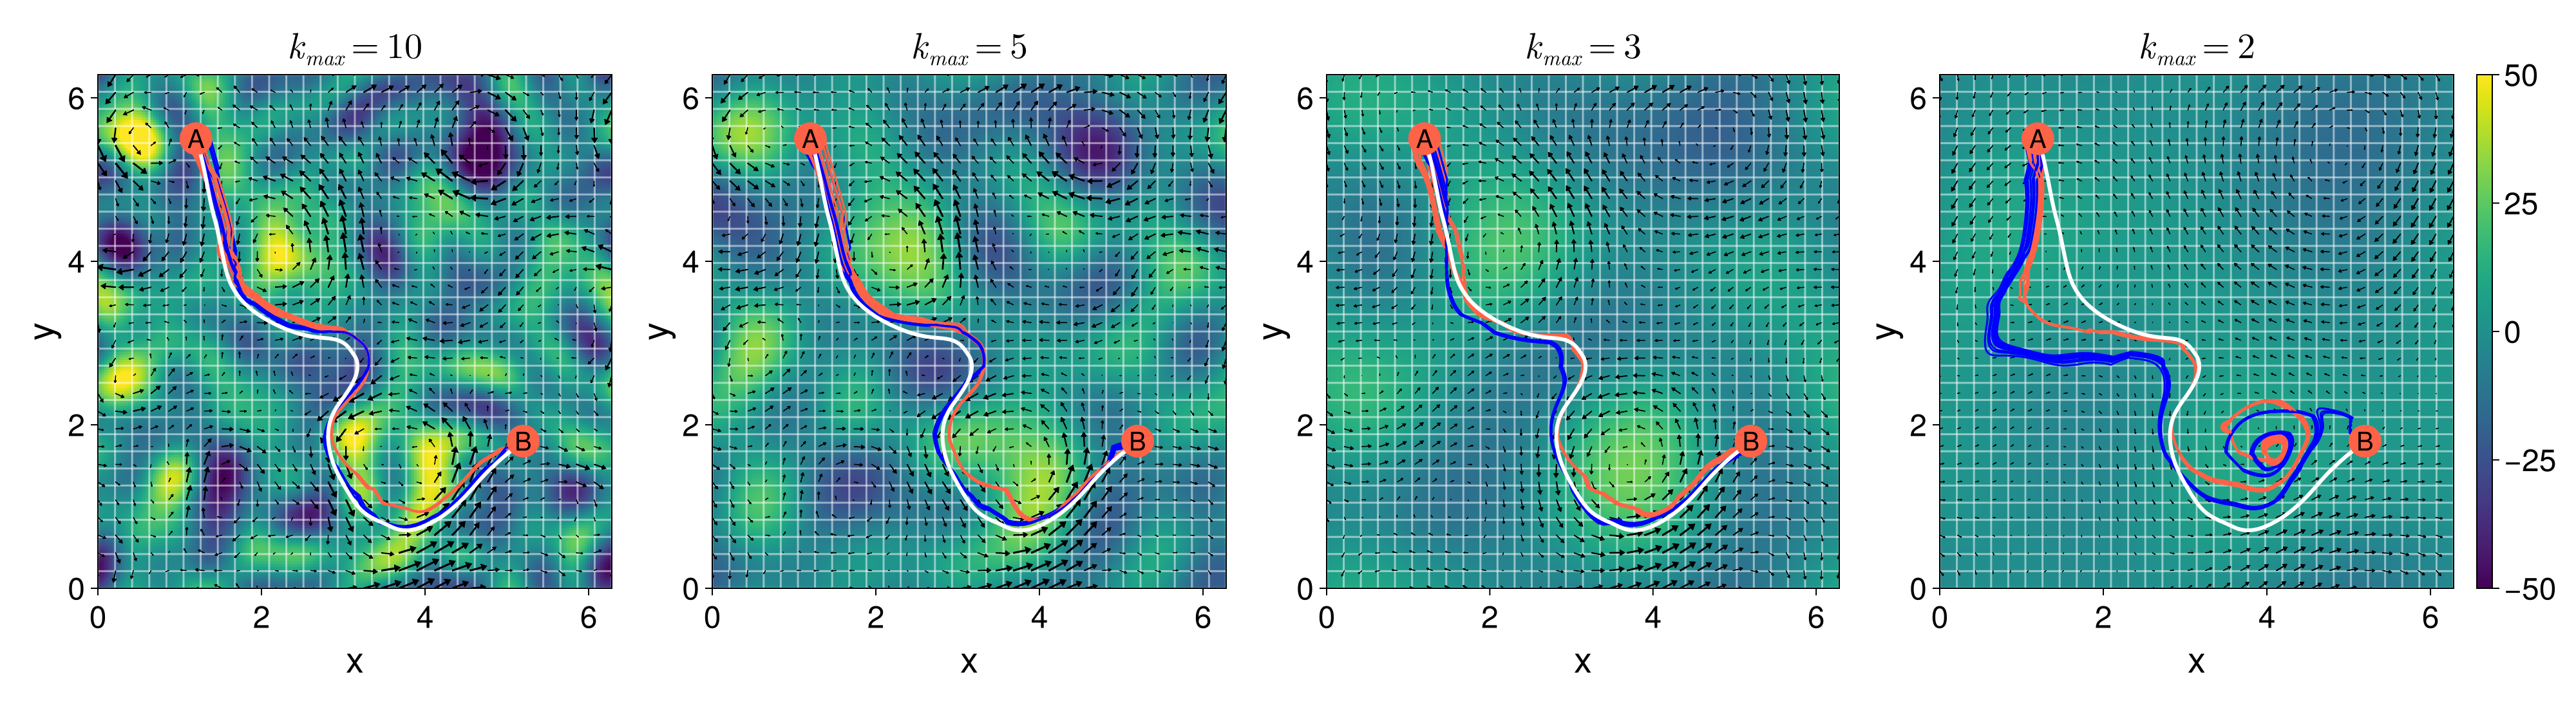

In [16]:
using CairoMakie, LaTeXStrings

fig = Figure(size = (2000, 550), fontsize=24)

xs = range(0, L, length=200)
ys = range(0, L, length=200)
zs = [vort_filt_10(x,y) for x in xs, y in ys]

xs2 = LinRange(0, L, N_tile)
ys2 = LinRange(0, L, N_tile)
us2 = [velX_filt_10(x,y) for x in xs2, y in ys2]
vs2 = [velY_filt_10(x,y) for x in xs2, y in ys2]

ax1 = Axis(fig[1, 1], title=L"k_{max}=10", titlesize=28,
    xlabel = "x", xlabelsize=28, xticklabelsize=24,
    ylabel = "y", ylabelsize=28, yticklabelsize=24,
    aspect = 1, limits = ((0, L), (0, L)), xticks=[0,2,4,6], yticks=[0,2,4,6]
)

hm = heatmap!(ax1, xs, ys, zs, colorrange=(-50, 50), colormap = :viridis, alpha=1.0)

hlines!(ax1, LinRange(0, L, N_tile+1), color=:white, alpha=0.5)
vlines!(ax1, LinRange(0, L, N_tile+1), color=:white, alpha=0.5)

arrows2d!(ax1, xs2, ys2, us2, vs2, lengthscale = 0.02, tiplength=4, tipwidth=6,
            shaftwidth=1.5)

for i in 1:10
    lines!(ax1, q_data_10["x_tracks_EV"][i], q_data_10["y_tracks_EV"][i], color=:tomato)
    lines!(ax1, ac_data_10["x_tracks_EV"][i], ac_data_10["y_tracks_EV"][i], color=:blue)
end

lines!(ax1, x_opt, y_opt, color=:white, linewidth=3)

poly!(ax1, Circle(Point2f(xA, yA), rA), color = :tomato)
text!(xA, yA, text = "A", align = (:center, :center), fontsize=20)

poly!(ax1, Circle(Point2f(xB, yB), rB), color = :tomato)
text!(xB, yB, text = "B", align = (:center, :center), fontsize=20)

####################################

xs = range(0, L, length=200)
ys = range(0, L, length=200)
zs = [vort_filt_5(x,y) for x in xs, y in ys]

xs2 = LinRange(0, L, N_tile)
ys2 = LinRange(0, L, N_tile)
us2 = [velX_filt_5(x,y) for x in xs2, y in ys2]
vs2 = [velY_filt_5(x,y) for x in xs2, y in ys2]

ax2 = Axis(fig[1, 2], title=L"k_{max}=5", titlesize=28,
    xlabel = "x", xlabelsize=28, xticklabelsize=24,
    ylabel = "y", ylabelsize=28, yticklabelsize=24,
    aspect = 1, limits = ((0, L), (0, L)), xticks=[0,2,4,6], yticks=[0,2,4,6]
)

hm = heatmap!(ax2, xs, ys, zs, colorrange=(-50, 50), colormap = :viridis, alpha=1.0)

hlines!(ax2, LinRange(0, L, N_tile+1), color=:white, alpha=0.5)
vlines!(ax2, LinRange(0, L, N_tile+1), color=:white, alpha=0.5)

arrows2d!(ax2, xs2, ys2, us2, vs2, lengthscale = 0.02, tiplength=4, tipwidth=6,
            shaftwidth=1.5)

for i in 1:10
    lines!(ax2, q_data_5["x_tracks_EV"][i], q_data_5["y_tracks_EV"][i], color=:tomato)
    lines!(ax2, ac_data_5["x_tracks_EV"][i], ac_data_5["y_tracks_EV"][i], color=:blue)
end

lines!(ax2, x_opt, y_opt, color=:white, linewidth=3)

poly!(ax2, Circle(Point2f(xA, yA), rA), color = :tomato)
text!(xA, yA, text = "A", align = (:center, :center), fontsize=20)

poly!(ax2, Circle(Point2f(xB, yB), rB), color = :tomato)
text!(xB, yB, text = "B", align = (:center, :center), fontsize=20)

####################################

xs = range(0, L, length=200)
ys = range(0, L, length=200)
zs = [vort_filt_3(x,y) for x in xs, y in ys]

xs2 = LinRange(0, L, N_tile)
ys2 = LinRange(0, L, N_tile)
us2 = [velX_filt_3(x,y) for x in xs2, y in ys2]
vs2 = [velY_filt_3(x,y) for x in xs2, y in ys2]

ax3 = Axis(fig[1, 3], title=L"k_{max}=3", titlesize=28,
    xlabel = "x", xlabelsize=28, xticklabelsize=24,
    ylabel = "y", ylabelsize=28, yticklabelsize=24,
    aspect = 1, limits = ((0, L), (0, L)), xticks=[0,2,4,6], yticks=[0,2,4,6]
)

hm = heatmap!(ax3, xs, ys, zs, colorrange=(-50, 50), colormap = :viridis, alpha=1.0)

hlines!(ax3, LinRange(0, L, N_tile+1), color=:white, alpha=0.5)
vlines!(ax3, LinRange(0, L, N_tile+1), color=:white, alpha=0.5)

arrows2d!(ax3, xs2, ys2, us2, vs2, lengthscale = 0.02, tiplength=4, tipwidth=6,
            shaftwidth=1.5)

for i in 1:10
    lines!(ax3, q_data_3["x_tracks_EV"][i], q_data_3["y_tracks_EV"][i], color=:tomato)
    lines!(ax3, ac_data_3["x_tracks_EV"][i], ac_data_3["y_tracks_EV"][i], color=:blue)
end

lines!(ax3, x_opt, y_opt, color=:white, linewidth=3)

poly!(ax3, Circle(Point2f(xA, yA), rA), color = :tomato)
text!(xA, yA, text = "A", align = (:center, :center), fontsize=20)

poly!(ax3, Circle(Point2f(xB, yB), rB), color = :tomato)
text!(xB, yB, text = "B", align = (:center, :center), fontsize=20)

####################################

xs = range(0, L, length=200)
ys = range(0, L, length=200)
zs = [vort_filt_2(x,y) for x in xs, y in ys]

xs2 = LinRange(0, L, N_tile)
ys2 = LinRange(0, L, N_tile)
us2 = [velX_filt_2(x,y) for x in xs2, y in ys2]
vs2 = [velY_filt_2(x,y) for x in xs2, y in ys2]

ax4 = Axis(fig[1, 4], title=L"k_{max}=2", titlesize=28,
    xlabel = "x", xlabelsize=28, xticklabelsize=24,
    ylabel = "y", ylabelsize=28, yticklabelsize=24,
    aspect = 1, limits = ((0, L), (0, L)), xticks=[0,2,4,6], yticks=[0,2,4,6]
)

hm = heatmap!(ax4, xs, ys, zs, colorrange=(-50, 50), colormap = :viridis, alpha=1.0)
Colorbar(fig[1, 5], hm, ticklabelsize=24, tellheight=true, ticks=[-50,-25,0,25,50])

rowsize!(fig.layout, 1, ax4.scene.viewport[].widths[2])

hlines!(ax4, LinRange(0, L, N_tile+1), color=:white, alpha=0.5)
vlines!(ax4, LinRange(0, L, N_tile+1), color=:white, alpha=0.5)

arrows2d!(ax4, xs2, ys2, us2, vs2, lengthscale = 0.02, tiplength=4, tipwidth=6,
            shaftwidth=1.5)

for i in 1:10
    lines!(ax4, q_data_2["x_tracks_EV"][i], q_data_2["y_tracks_EV"][i], color=:tomato)
    lines!(ax4, ac_data_2["x_tracks_EV"][i], ac_data_2["y_tracks_EV"][i], color=:blue)
end

lines!(ax4, x_opt, y_opt, color=:white, linewidth=3)

poly!(ax4, Circle(Point2f(xA, yA), rA), color = :tomato)
text!(xA, yA, text = "A", align = (:center, :center), fontsize=20)

poly!(ax4, Circle(Point2f(xB, yB), rB), color = :tomato)
text!(xB, yB, text = "B", align = (:center, :center), fontsize=20)

####################################

save("RL_2d_turb_snap_filt.pdf", fig)
fig

### Collected Statistics

In [1]:
using Plots, Statistics, LaTeXStrings

Q_256_T = [0.9609767460103722, 0.9794616223548567, 0.957658408721028, 0.9060532191021972, 0.9648373960239461,
            0.9376502922441458, 0.9273309359102224, 0.9134648263333381, 0.9010350747469853, 0.9755421166967926]
Q_256_fail = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Q_256_p = ones(10).-Q_256_fail
Q_256_g = Q_256_p./sum(Q_256_p)

Q_10_T = [0.926352811151792, 1.040224449693008, 0.9386200090533624, 0.958101227379572, 0.9190322900371235,
            0.9667179739978905, 0.9046589008577303, 0.9107154269407308, 0.9636574804844072, 1.0029744523286355]
Q_10_fail = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Q_10_p = ones(10).-Q_10_fail
Q_10_g = Q_10_p./sum(Q_10_p)

Q_5_T = [0.9402861843223791, 0.9325817001936563, 0.9284926342264662, 1.0709695376130777, 0.9284169626835501, 
            0, 0.9132434170040659, 0.9255344374284061, 0.9765734918002378, 0.9448769245926032]
Q_5_fail = [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
Q_5_p = ones(10).-Q_5_fail
Q_5_g = Q_5_p./sum(Q_5_p)

Q_3_T = [0.9124054247325172, 0.9189047694740619, 1.059260067009294, 0.9149180002222947, 0.9283328831914216, 
            1.8023883667031884, 0.9740889428078361, 0.9086610846830541, 0.9250523816735353, 0.9159409673765267]
Q_3_fail = [0, 0, 0, 0, 0, 0.7016, 0, 0, 0, 0]
Q_3_p = ones(10).-Q_3_fail
Q_3_g = Q_3_p./sum(Q_3_p)

Q_2_T = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Q_2_fail = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Q_2_p = ones(10).-Q_2_fail

########################

AC_256_T = [0.8660005517018435, 0.869443606904512, 0.8595362400820191, 0.870236756780259, 0.8612850935182951, 
             0.8726316209810567, 0.8641732240729143, 0.864620246706065, 0.8766436140804624, 0.8677031614174487]
AC_256_fail = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
AC_256_p = ones(10).-AC_256_fail
AC_256_g = AC_256_p./sum(AC_256_p)

AC_10_T = [0.8674929626871273, 0.867286967931412, 0.8759555635698761, 0.868790589515646, 0.8709948735342856,
             0.8736573907850262, 0.8625070488038982, 0.877705818331021, 0.8838982729262963, 0.8735396794960463]
AC_10_fail = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
AC_10_p = ones(10).-AC_10_fail
AC_10_g = AC_10_p./sum(AC_10_p)

AC_5_T = [0.9084873203993217, 0.9224473187424157, 0.9039176000021293, 0.9069108299219093, 0.9061961542388155, 
            0.9038965801290971, 0.905398800388462, 0.8919502856224841, 0.8904676839112821, 0.8889010027079514]
AC_5_fail = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
AC_5_p = ones(10).-AC_5_fail
AC_5_g = AC_5_p./sum(AC_5_p)

AC_3_T = [0.8825558037019757, 0.8851902944553401, 0.883612402653059, 0.8802758481404203, 0.8820443201248596, 
            0.8885506714907486, 0.8824226778394386, 0.8973790181642572, 0.8799521420957251, 0.8848567791365632]
AC_3_fail = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
AC_3_p = ones(10).-AC_3_fail
AC_3_g = AC_3_p./sum(AC_3_p)

AC_2_T = [1.6527278022597565, 1.6014214280252874, 0, 1.650569135039986, 1.6822003098432499, 
            1.5541651640032053, 1.6426798327382703, 1.6084468842045319, 1.630821997772579, 1.5991646923034437]
AC_2_fail = [0.7652, 0.19240000000000002, 1, 0.025599999999999956, 0.7452,
                0.3248, 0.6624, 0.03259999999999996, 0.6866, 0.26559999999999995]
AC_2_p = ones(10).-AC_2_fail
AC_2_g = AC_2_p./sum(AC_2_p)

#########################

kf = 5.5
k_max = [256, 10, 5, 3, 2]

nothing

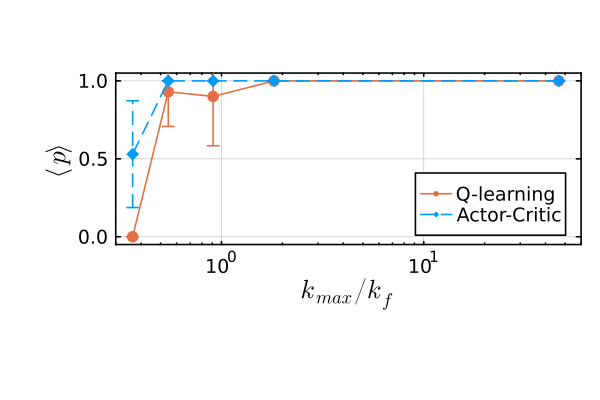

In [2]:
x_vals = k_max./kf
y_q_vals = [mean(Q_256_p), mean(Q_10_p), mean(Q_5_p), mean(Q_3_p), mean(Q_2_p)]
y_q_err = [std(Q_256_p), std(Q_10_p), std(Q_5_p), std(Q_3_p), std(Q_2_p)]
y_ac_vals = [mean(AC_256_p), mean(AC_10_p), mean(AC_5_p), mean(AC_3_p), mean(AC_2_p)]
y_ac_err = [std(AC_256_p), std(AC_10_p), std(AC_5_p), std(AC_3_p), std(AC_2_p)]

plot(x_vals, y_q_vals, yerr=y_q_err, xaxis=:log10, lc=2, framestyle=:box, xlim=(0.3, 60), ylim=(-0.05,1.05), legend=:bottomright, label="Q-learning", xminorticks=9,
        xlabel=L"k_{max}/k_f", ylabel=L"\langle p \rangle", aspect_ratio=20, yticks=[0,0.5,1], marker=:circle, mc=2, msc=2, thickness_scaling=1.6)
p1 = plot!(x_vals, y_ac_vals, yerr=y_ac_err, lc=1, label="Actor-Critic", marker=:diamond, mc=1, ls=:dash, msc=1)

#savefig(p1, "success.svg")

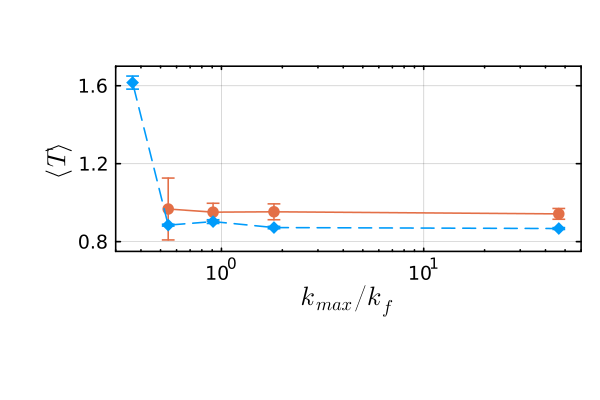

In [14]:
y_q_vals = [sum(Q_256_g.*Q_256_T), sum(Q_10_g.*Q_10_T), sum(Q_5_g.*Q_5_T), sum(Q_3_g.*Q_3_T)]
y_q_var = [sum(Q_256_g.*(Q_256_T.-y_q_vals[1]).^2), sum(Q_10_g.*(Q_10_T.-y_q_vals[2]).^2), sum(Q_5_g.*(Q_5_T.-y_q_vals[3]).^2), sum(Q_3_g.*(Q_3_T.-y_q_vals[4]).^2)]

y_ac_vals = [sum(AC_256_g.*AC_256_T), sum(AC_10_g.*AC_10_T), sum(AC_5_g.*AC_5_T), sum(AC_3_g.*AC_3_T), sum(AC_2_g.*AC_2_T)]
y_ac_var = [sum(AC_256_g.*(AC_256_T.-y_ac_vals[1]).^2), sum(AC_10_g.*(AC_10_T.-y_ac_vals[2]).^2), sum(AC_5_g.*(AC_5_T.-y_ac_vals[3]).^2), 
                sum(AC_3_g.*(AC_3_T.-y_ac_vals[4]).^2), sum(AC_2_g.*(AC_2_T.-y_ac_vals[5]).^2)]

plot(x_vals[1:end-1], y_q_vals, yerr=sqrt.(y_q_var), xaxis=:log10, lc=2, framestyle=:box, xlim=(0.3, 60), ylim=(0.75, 1.7), label="Q-learning", xminorticks=9,
        xlabel=L"k_{max}/k_f", ylabel=L"\langle T \rangle", marker=:circle, mc=2, msc=2, thickness_scaling=1.6, aspect_ratio=25, yticks=[0.8,1.2,1.6], legend=false)
p2=plot!(x_vals, y_ac_vals, yerr=sqrt.(y_ac_var), lc=1, label="Actor-Critic", marker=:diamond, mc=1, ls=:dash, msc=1)

#savefig(p2, "time.svg")